## Ejercicio manejo de datos y Limpieza

 - Importa los datos de FIFA.csv, Contienen información de jugadores de futbol
 - Realiza una limpieza de datos:
   - ¿De qué formato son nuestras variables? ¿cuántas líneas y columnas tiene el dataset?
   - Cambia las medidas de las variables Weight y Height a Kg y cm
   - Elimina el "+1", "+2"... de las variables CDM, RDM... y todas las columnas que están al final, sin tener que ir una por una. Apóyate en métodos como split, replace...
   - Arregla también las variables W/F, SM, IR
   - Para posteriormente hacer un buen análisis de datos por posición del jugador sería recomendable agrupar o normalizar las posiciones (BP, Best Position) en Portero, Defensa, Mediocampista y delantero. Quizás lo mejor sería crear una función posiciones_jugadores y dependiendo de la BP de cada uno que la nueva variable tome uno de esos 4 valores.
   - También vamos a querer calcular algunas métricas sobre el valor de los jugadores, Transforma las variables Value y Wage de manera que sea un entero y podamos calcular la suma y la media por equipo, posición, nacionalidad...
 - Tratamiento de valores nulos:
   - Localiza las variables que tienen valores nulos y cuenta cuántos tiene cada una de ellas
   - Decide qué hacer con ellos, si eliminarlos, imputarles un valor fijo, imputarles un valor en función de alguna condición...
 - Valores extremos
   - Localiza si las variables numéricas toman valores demasiado elevados o bajos, usa la función describe y pinta gráficos
   - Si existe alguno que sea absurdo (por ejemplo una altura en negativo) corrígelo. Si no, trátalo de la manera que más nos convenga para un futuro análisis exploratorio, por ejemplo limítalo a un valor más bajo.
 - Análisis descriptivo
   - Una vez tenemos nuestros datos limpios de irregularidades, de valores nulos y erróneos podemos emepezar a analizar su contenido
   - Compara las variables numéricas en función de variables categóricas, como su posición. Respóndete a preguntas tales como qué jugadores son más caros, más altos... Para ello representa una tabla con la suma, la media y la cuenta para cada posición. También dibuja un gráfico que consideres el más conveniente para analizar la misma información visualmente. 
   - OVA representa una valoración general del jugador, analiza si tiene alguna relación con otras columnas referentes a la calidad como Attacking, Defending... A mayor OVA mayor Value?

In [1]:
import pandas as pd

In [2]:
df_fifa = pd.read_csv('fifa.csv')
df_fifa.head()

,Unnamed: 0,ID,Name,Age,Nationality,Club,BP,Position,Team & Contract,Height,...,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK,OVA
0,1954,184383,A. Pasche,26,Switzerland,FC Lausanne-Sport,CM,CM CDM,FC Lausanne-Sport 2015 ~ 2020,"5'9""",...,59+1,59+1,59+1,58+1,54+1,54+1,54+1,58+1,15+1,64
1,2225,188044,Alan Carvalho,30,China PR,Beijing Sinobo Guoan FC,ST,ST LW LM,"Beijing Sinobo Guoan FC Dec 31, 2020 On Loan","6'0""",...,53+2,53+2,57+2,53+2,48+2,48+2,48+2,53+2,18+2,77
2,1959,184431,S. Giovinco,33,Italy,Al Hilal,CAM,CAM CF,Al Hilal 2019 ~ 2022,"5'4""",...,56+2,56+2,59+2,53+2,41+2,41+2,41+2,53+2,12+2,80
3,9815,233796,J. Evans,22,Wales,Swansea City,CDM,CDM CM,Swansea City 2016 ~ 2021,"5'10""",...,58+2,58+2,56+2,57+2,58+2,58+2,58+2,57+2,14+2,59
4,10074,234799,Y. Demoncy,23,France,US Orléans Loiret Football,CDM,CDM CM,US Orléans Loiret Football 2018 ~ 2021,"5'11""",...,64+2,64+2,64+2,63+2,61+2,61+2,61+2,63+2,15+2,65


In [3]:
df_fifa.Height

0         5'9"
1         6'0"
2         5'4"
3        5'10"
4        5'11"
         ...  
13695     5'8"
13696     6'5"
13697     5'7"
13698    5'11"
13699    5'10"
Name: Height, Length: 13700, dtype: object

In [4]:
df_fifa.columns[3:]

Index(['Age', 'Nationality', 'Club', 'BP', 'Position', 'Team & Contract',
       'Height', 'Weight', 'foot', 'Growth', 'Joined', 'Loan Date End',
       'Value', 'Wage', 'Release Clause', 'Contract', 'Attacking', 'Crossing',
       'Finishing', 'Heading Accuracy', 'Short Passing', 'Volleys', 'Skill',
       'Dribbling', 'Curve', 'FK Accuracy', 'Long Passing', 'Ball Control',
       'Movement', 'Acceleration', 'Sprint Speed', 'Agility', 'Reactions',
       'Balance', 'Power', 'Shot Power', 'Jumping', 'Stamina', 'Strength',
       'Long Shots', 'Mentality', 'Aggression', 'Interceptions', 'Positioning',
       'Vision', 'Penalties', 'Composure', 'Defending', 'Marking',
       'Standing Tackle', 'Sliding Tackle', 'Goalkeeping', 'GK Diving',
       'GK Handling', 'GK Kicking', 'GK Positioning', 'GK Reflexes',
       'Total Stats', 'Base Stats', 'W/F', 'SM', 'A/W', 'D/W', 'IR', 'PAC',
       'SHO', 'PAS', 'DRI', 'DEF', 'PHY', 'Hits', 'LS', 'ST', 'RS', 'LW', 'LF',
       'CF', 'RF', 'RW', 'LA

In [5]:
df_fifa[['W/F', 'SM', 'A/W', 'D/W', 'IR','Value', 'Wage']]

,W/F,SM,A/W,D/W,IR,Value,Wage
0,4 ★,2★,High,Medium,1 ★,€525K,€4K
1,3 ★,4★,High,Low,2 ★,€8.5M,€23K
2,4 ★,4★,High,Medium,2 ★,€9M,€49K
3,2 ★,2★,Medium,Medium,1 ★,€275K,€4K
4,2 ★,3★,Low,Medium,1 ★,€725K,€2K
...,...,...,...,...,...,...,...
13695,3 ★,2★,High,Medium,1 ★,€325K,€1K
13696,2 ★,1★,Medium,Medium,1 ★,€190K,€700
13697,4 ★,4★,High,Medium,2 ★,€8M,€9K
13698,3 ★,2★,Medium,Medium,1 ★,€140K,€4K


## Limpieza de Datos

In [3]:
df_fifa.shape

(13700, 102)

Nuestro dataframe, consta de 13700 filas y 102 columnas

In [6]:
df_fifa['Weight'] = [str(float(i[:-3])*0.45359237) for i in df_fifa['Weight']]
df_fifa['Height']= [str((float(i.split("'")[0])*60 +float(i.split("'")[1][:-1]))*2.54) for i in df_fifa['Height']]

Hemos utilizado una list comprehension para poder pasar de libras a kg y de pulgadas a cm

In [4]:
## definimos un patron de busqueda en una función para despues poder utilizarla con apply
def search_pattern(serie):
    return serie.astype(str).str.contains(r'\+[12]$').any()

columns_w_patterns= df_fifa.apply(search_pattern)
columns_toclean = list(columns_w_patterns.index[columns_w_patterns == True])
for col in columns_toclean:
    df_fifa[col] = [i.split("+")[0]for i in df_fifa[col]]

In [8]:
## debido a los datos, vemos que hay un espacio entre el número y la estrella, por lo tanto nos quedamos con la primera entrada del split.
for col in ['W/F','SM','IR']:
    df_fifa[col] = [i.split(' ')[0] for i in df_fifa[col]]

In [9]:
df_fifa.drop(columns='Position') ## Elimino la columna position ya que nos da información redundante

,Unnamed: 0,ID,Name,Age,Nationality,Club,BP,Team & Contract,Height,Weight,...,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK,OVA
0,1954,184383,A. Pasche,26,Switzerland,FC Lausanne-Sport,CM,FC Lausanne-Sport 2015 ~ 2020,784.86,73.02837157,...,59,59,59,58,54,54,54,58,15,64
1,2225,188044,Alan Carvalho,30,China PR,Beijing Sinobo Guoan FC,ST,"Beijing Sinobo Guoan FC Dec 31, 2020 On Loan",914.4,72.12118683,...,53,53,57,53,48,48,48,53,18,77
2,1959,184431,S. Giovinco,33,Italy,Al Hilal,CAM,Al Hilal 2019 ~ 2022,772.16,60.781377580000004,...,56,56,59,53,41,41,41,53,12,80
3,9815,233796,J. Evans,22,Wales,Swansea City,CDM,Swansea City 2016 ~ 2021,787.4,68.94604024,...,58,58,56,57,58,58,58,57,14,59
4,10074,234799,Y. Demoncy,23,France,US Orléans Loiret Football,CDM,US Orléans Loiret Football 2018 ~ 2021,789.94,68.0388555,...,64,64,64,63,61,61,61,63,15,65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13695,11284,239074,S. Aw,21,Senegal,Gil Vicente FC,LB,Gil Vicente FC 2020 ~ 2023,782.32,64.86370891,...,52,52,58,58,54,54,54,58,15,60
13696,11964,241223,S. Mogi,21,Japan,Cerezo Osaka,GK,Cerezo Osaka 2017 ~ 2021,927.1,79.83225712000001,...,23,23,20,20,22,22,22,20,58,59
13697,5390,210930,Carles Gil,27,Spain,New England Revolution,RM,New England Revolution 2019 ~ 2024,779.78,66.22448602,...,60,60,62,57,47,47,47,57,18,76
13698,860,162993,J. Perch,34,England,Mansfield Town,CDM,Mansfield Town 2020 ~ 2021,789.94,79.83225712000001,...,62,62,60,60,63,63,63,60,14,63


In [11]:
#Definimos las diferentes posiciones que pueden abarcar las 4 categorias principales que queremos renombrar.
porteros = ["GK"]
defensas = ["CB", "RB", "LB", "WB", "SW","LWB","RWB"]
centrocampistas = ["DM", "CM", "AM", "LM", "RM", "RW", "LW","CDM","CAM"]
delanteros = ["ST", "CF", "SD", "SDI", "SDD"]
posiciones_dict = {pos: "Portero" for pos in porteros}
posiciones_dict.update({pos: "Defensa" for pos in defensas})
posiciones_dict.update({pos: "Centrocampista" for pos in centrocampistas})
posiciones_dict.update({pos: "Delantero" for pos in delanteros})

In [12]:
df_fifa['BP'] = df_fifa['BP'].replace(posiciones_dict) # reemplazamos los valores de la tabla con las 4 posiciones

In [13]:
## realizamos una función para poder escoger el numero que hay entre los simbolos especiales y multiplicarlo por el valor de millón o miles.
def convert_value(val):
    try:
        if val.endswith('M'):
            return float(val[1:-1]) * 1000000
        elif val.endswith('K'):
            return float(val[1:-1]) * 1000
        else:
            return float(val[1:])
    except (ValueError, IndexError):
        return None  
        
df_fifa['Value'] = df_fifa['Value'].apply(convert_value)
df_fifa['Wage'] = df_fifa['Wage'].apply(convert_value)

In [14]:
## miramos que variables presentan un mayor numero de lugares vacios
for col in list(df_fifa.columns[3:]):
    if df_fifa[col].isnull().sum() + df_fifa[col].isna().sum() > 0:
        print(col+': ',(df_fifa[col].isnull().sum() + df_fifa[col].isna().sum())/len(df_fifa))

Club:  0.003065693430656934
Position:  0.05007299270072993
Joined:  0.006423357664233576
Loan Date End:  1.8921167883211678
Volleys:  0.006423357664233576
Curve:  0.006423357664233576
Agility:  0.006423357664233576
Balance:  0.006423357664233576
Jumping:  0.006423357664233576
Interceptions:  0.0010218978102189782
Positioning:  0.0010218978102189782
Vision:  0.006423357664233576
Composure:  0.04802919708029197
Sliding Tackle:  0.006423357664233576
A/W:  0.00978102189781022
D/W:  0.00978102189781022


In [15]:
## Decidimos eliminar la variable Loan Date End, porque hay muchísimos valores nulos y/o vacios.
df_fifa.drop(columns='Loan Date End')

,Unnamed: 0,ID,Name,Age,Nationality,Club,BP,Position,Team & Contract,Height,...,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK,OVA
0,1954,184383,A. Pasche,26,Switzerland,FC Lausanne-Sport,Centrocampista,CM CDM,FC Lausanne-Sport 2015 ~ 2020,784.86,...,59,59,59,58,54,54,54,58,15,64
1,2225,188044,Alan Carvalho,30,China PR,Beijing Sinobo Guoan FC,Delantero,ST LW LM,"Beijing Sinobo Guoan FC Dec 31, 2020 On Loan",914.4,...,53,53,57,53,48,48,48,53,18,77
2,1959,184431,S. Giovinco,33,Italy,Al Hilal,Centrocampista,CAM CF,Al Hilal 2019 ~ 2022,772.16,...,56,56,59,53,41,41,41,53,12,80
3,9815,233796,J. Evans,22,Wales,Swansea City,Centrocampista,CDM CM,Swansea City 2016 ~ 2021,787.4,...,58,58,56,57,58,58,58,57,14,59
4,10074,234799,Y. Demoncy,23,France,US Orléans Loiret Football,Centrocampista,CDM CM,US Orléans Loiret Football 2018 ~ 2021,789.94,...,64,64,64,63,61,61,61,63,15,65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13695,11284,239074,S. Aw,21,Senegal,Gil Vicente FC,Defensa,LB,Gil Vicente FC 2020 ~ 2023,782.32,...,52,52,58,58,54,54,54,58,15,60
13696,11964,241223,S. Mogi,21,Japan,Cerezo Osaka,Portero,GK,Cerezo Osaka 2017 ~ 2021,927.1,...,23,23,20,20,22,22,22,20,58,59
13697,5390,210930,Carles Gil,27,Spain,New England Revolution,Centrocampista,RM CAM CM,New England Revolution 2019 ~ 2024,779.78,...,60,60,62,57,47,47,47,57,18,76
13698,860,162993,J. Perch,34,England,Mansfield Town,Centrocampista,CDM RB CM,Mansfield Town 2020 ~ 2021,789.94,...,62,62,60,60,63,63,63,60,14,63


In [16]:
df_fifa_clean = df_fifa.dropna() ## También eliminamos todas las filas que tengan valores nulos.

In [17]:
## nos aseguramos que hemos quitado todo los valores nulos y NaNs
for col in list(df_fifa_clean.columns[3:]):
    if df_fifa_clean[col].isnull().sum() + df_fifa_clean[col].isna().sum() > 0:
        print(col+': ',(df_fifa_clean[col].isnull().sum() + df_fifa_clean[col].isna().sum())/len(df_fifa))

In [18]:
## utilizamos el z-score para identificar posibles valores atípicos.
from scipy import stats
z_scores=pd.DataFrame()
for col in list(df_fifa_clean.columns[3:]):
    if pd.api.types.is_numeric_dtype(df_fifa_clean[col]) == True:
        z_scores[col] = stats.zscore(df_fifa_clean[col])

La columna Age tiene estos outliers: 0.0068775790921595595


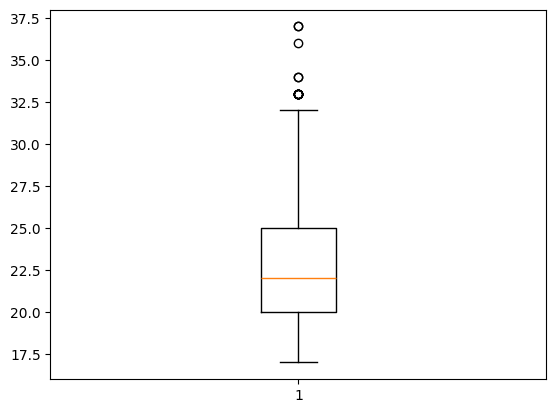

********************
La columna Growth tiene estos outliers: 0.001375515818431912


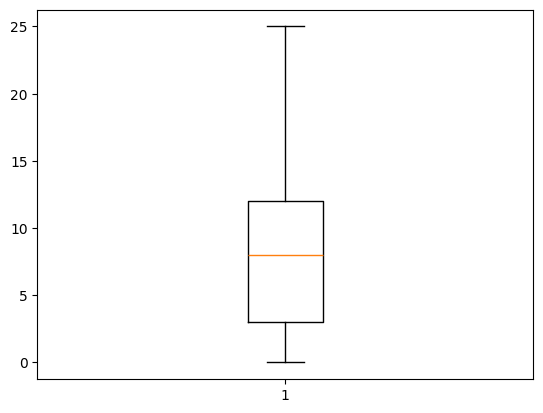

********************
La columna Value tiene estos outliers: 0.017881705639614855


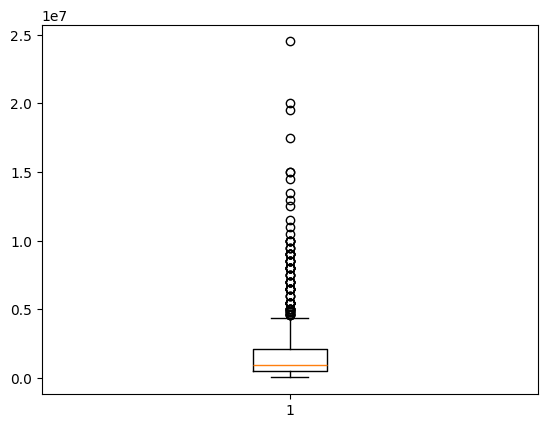

********************
La columna Wage tiene estos outliers: 0.023383768913342505


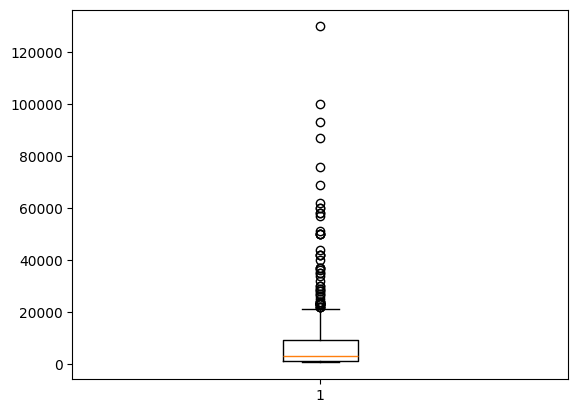

********************
La columna Attacking no tiene outliers
La columna Crossing no tiene outliers
La columna Finishing no tiene outliers
La columna Heading Accuracy no tiene outliers
La columna Short Passing no tiene outliers
La columna Volleys no tiene outliers
La columna Skill no tiene outliers
La columna Dribbling no tiene outliers
La columna Curve no tiene outliers
La columna FK Accuracy no tiene outliers
La columna Long Passing no tiene outliers
La columna Ball Control no tiene outliers
La columna Movement no tiene outliers
La columna Acceleration no tiene outliers
La columna Sprint Speed no tiene outliers
La columna Agility no tiene outliers
La columna Reactions no tiene outliers
La columna Balance no tiene outliers
La columna Power no tiene outliers
La columna Shot Power no tiene outliers
La columna Jumping no tiene outliers
La columna Stamina no tiene outliers
La columna Strength no tiene outliers
La columna Long Shots no tiene outliers
La columna Mentality no tiene outliers
La

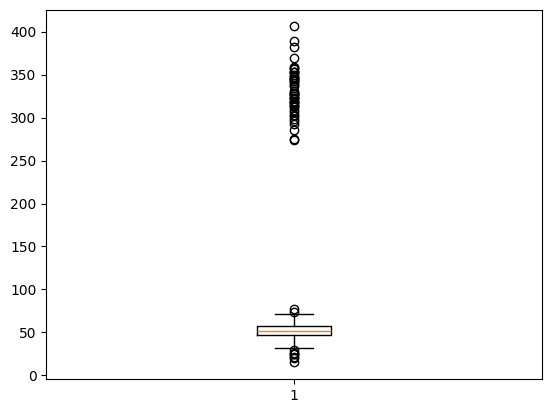

********************
La columna GK Diving tiene estos outliers: 0.061898211829436035


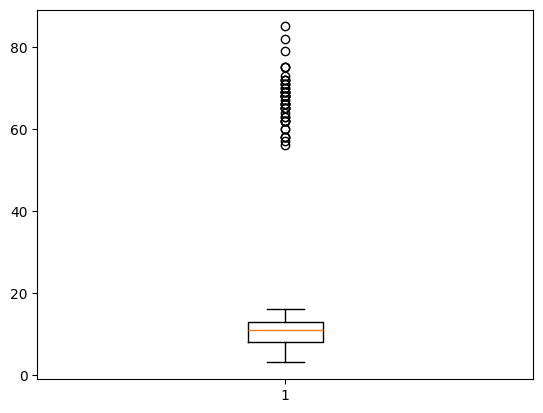

********************
La columna GK Handling tiene estos outliers: 0.06327372764786796


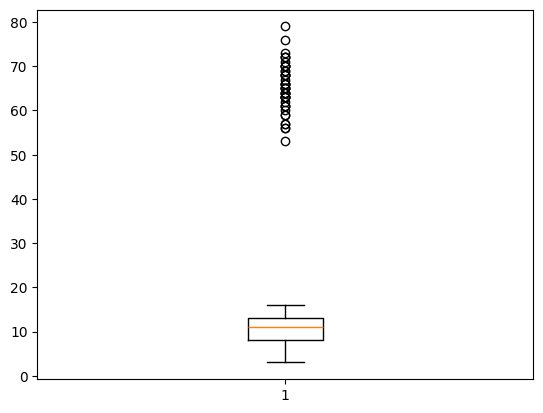

********************
La columna GK Kicking tiene estos outliers: 0.061898211829436035


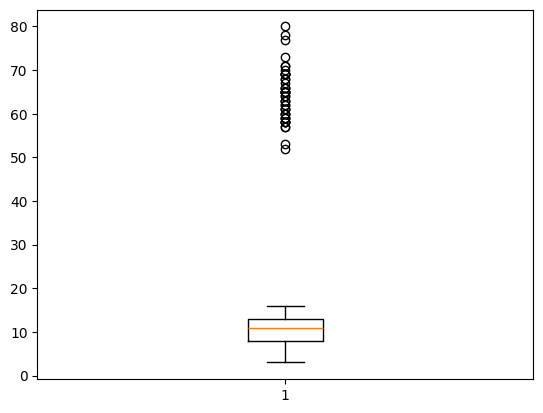

********************
La columna GK Positioning tiene estos outliers: 0.06052269601100413


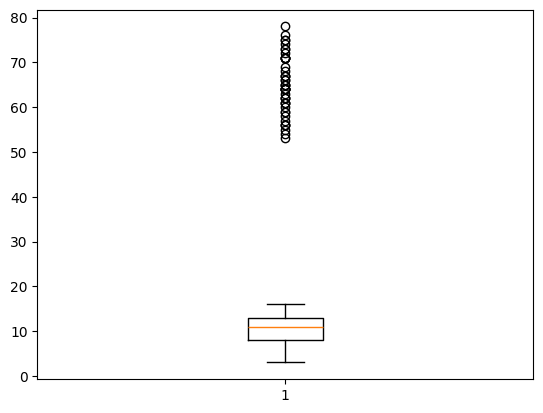

********************
La columna GK Reflexes tiene estos outliers: 0.061898211829436035


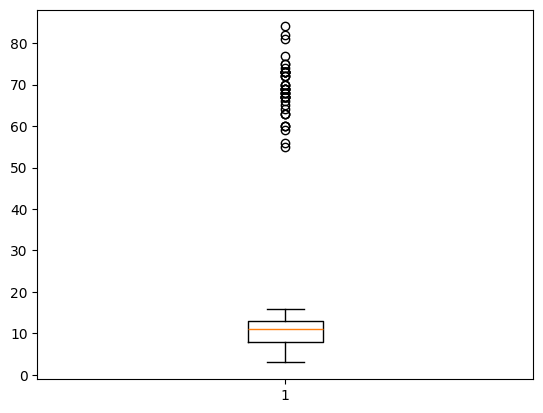

********************
La columna Total Stats no tiene outliers
La columna Base Stats tiene estos outliers: 0.001375515818431912


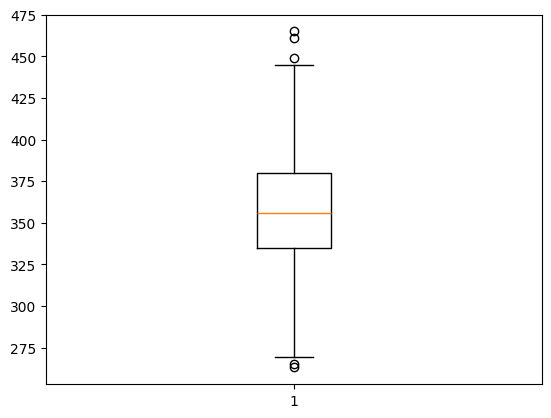

********************
La columna PAC no tiene outliers
La columna SHO no tiene outliers
La columna PAS no tiene outliers
La columna DRI no tiene outliers
La columna DEF no tiene outliers
La columna PHY no tiene outliers
La columna OVA tiene estos outliers: 0.001375515818431912


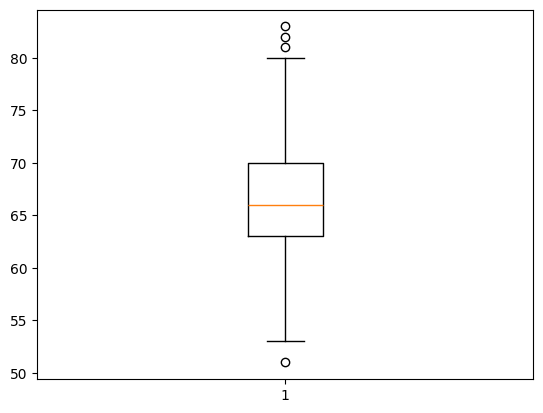

********************


In [21]:
## Ahora estudiamos los valores de z_score para cada variable númerica.
import matplotlib.pyplot as plt

for col in list(df_fifa_clean.columns[3:]):
    if pd.api.types.is_numeric_dtype(df_fifa_clean[col]) == True:
        if len(df_fifa_clean[z_scores[col] > 3]) > 0:
            print(f'La columna {col} tiene estos outliers:',len(df_fifa_clean[z_scores[col] > 3])/len(df_fifa_clean))
            plt.boxplot(df_fifa_clean[col])
            plt.show()
            print('********************')
        else:
            print(f'La columna {col} no tiene outliers')

No voy a quitar ningún outlier, ya que teniendo en cuenta las variables que presentan datos atípicos también se debe en parte, a la diferencia de grupos. Por ejemplo, tenemos que las variables relacionadas con los porteros, presentan, outliers porque también estamos considerando otras categorias como delanteros, centrocampistas e incluso defensas. 
En las otras categorias, no he visto ningun dato que sea excesivamente crítico, por lo que he optado por mantener todos los datos una vez limpios. 

## EDA

Para empezar el analisis exploratorio, se realiza una matriz de correlación representada en forma de heatmap, dónde solo aquellas variables que presenten una correlación superior a 0.8 o inferior a -0.8 son consideradas.

In [22]:
df_fifa_num= pd.DataFrame()
for col in list(df_fifa_clean.columns[3:]):
    if pd.api.types.is_numeric_dtype(df_fifa_clean[col]) == True:
        df_fifa_num[col] =df_fifa_clean[col]

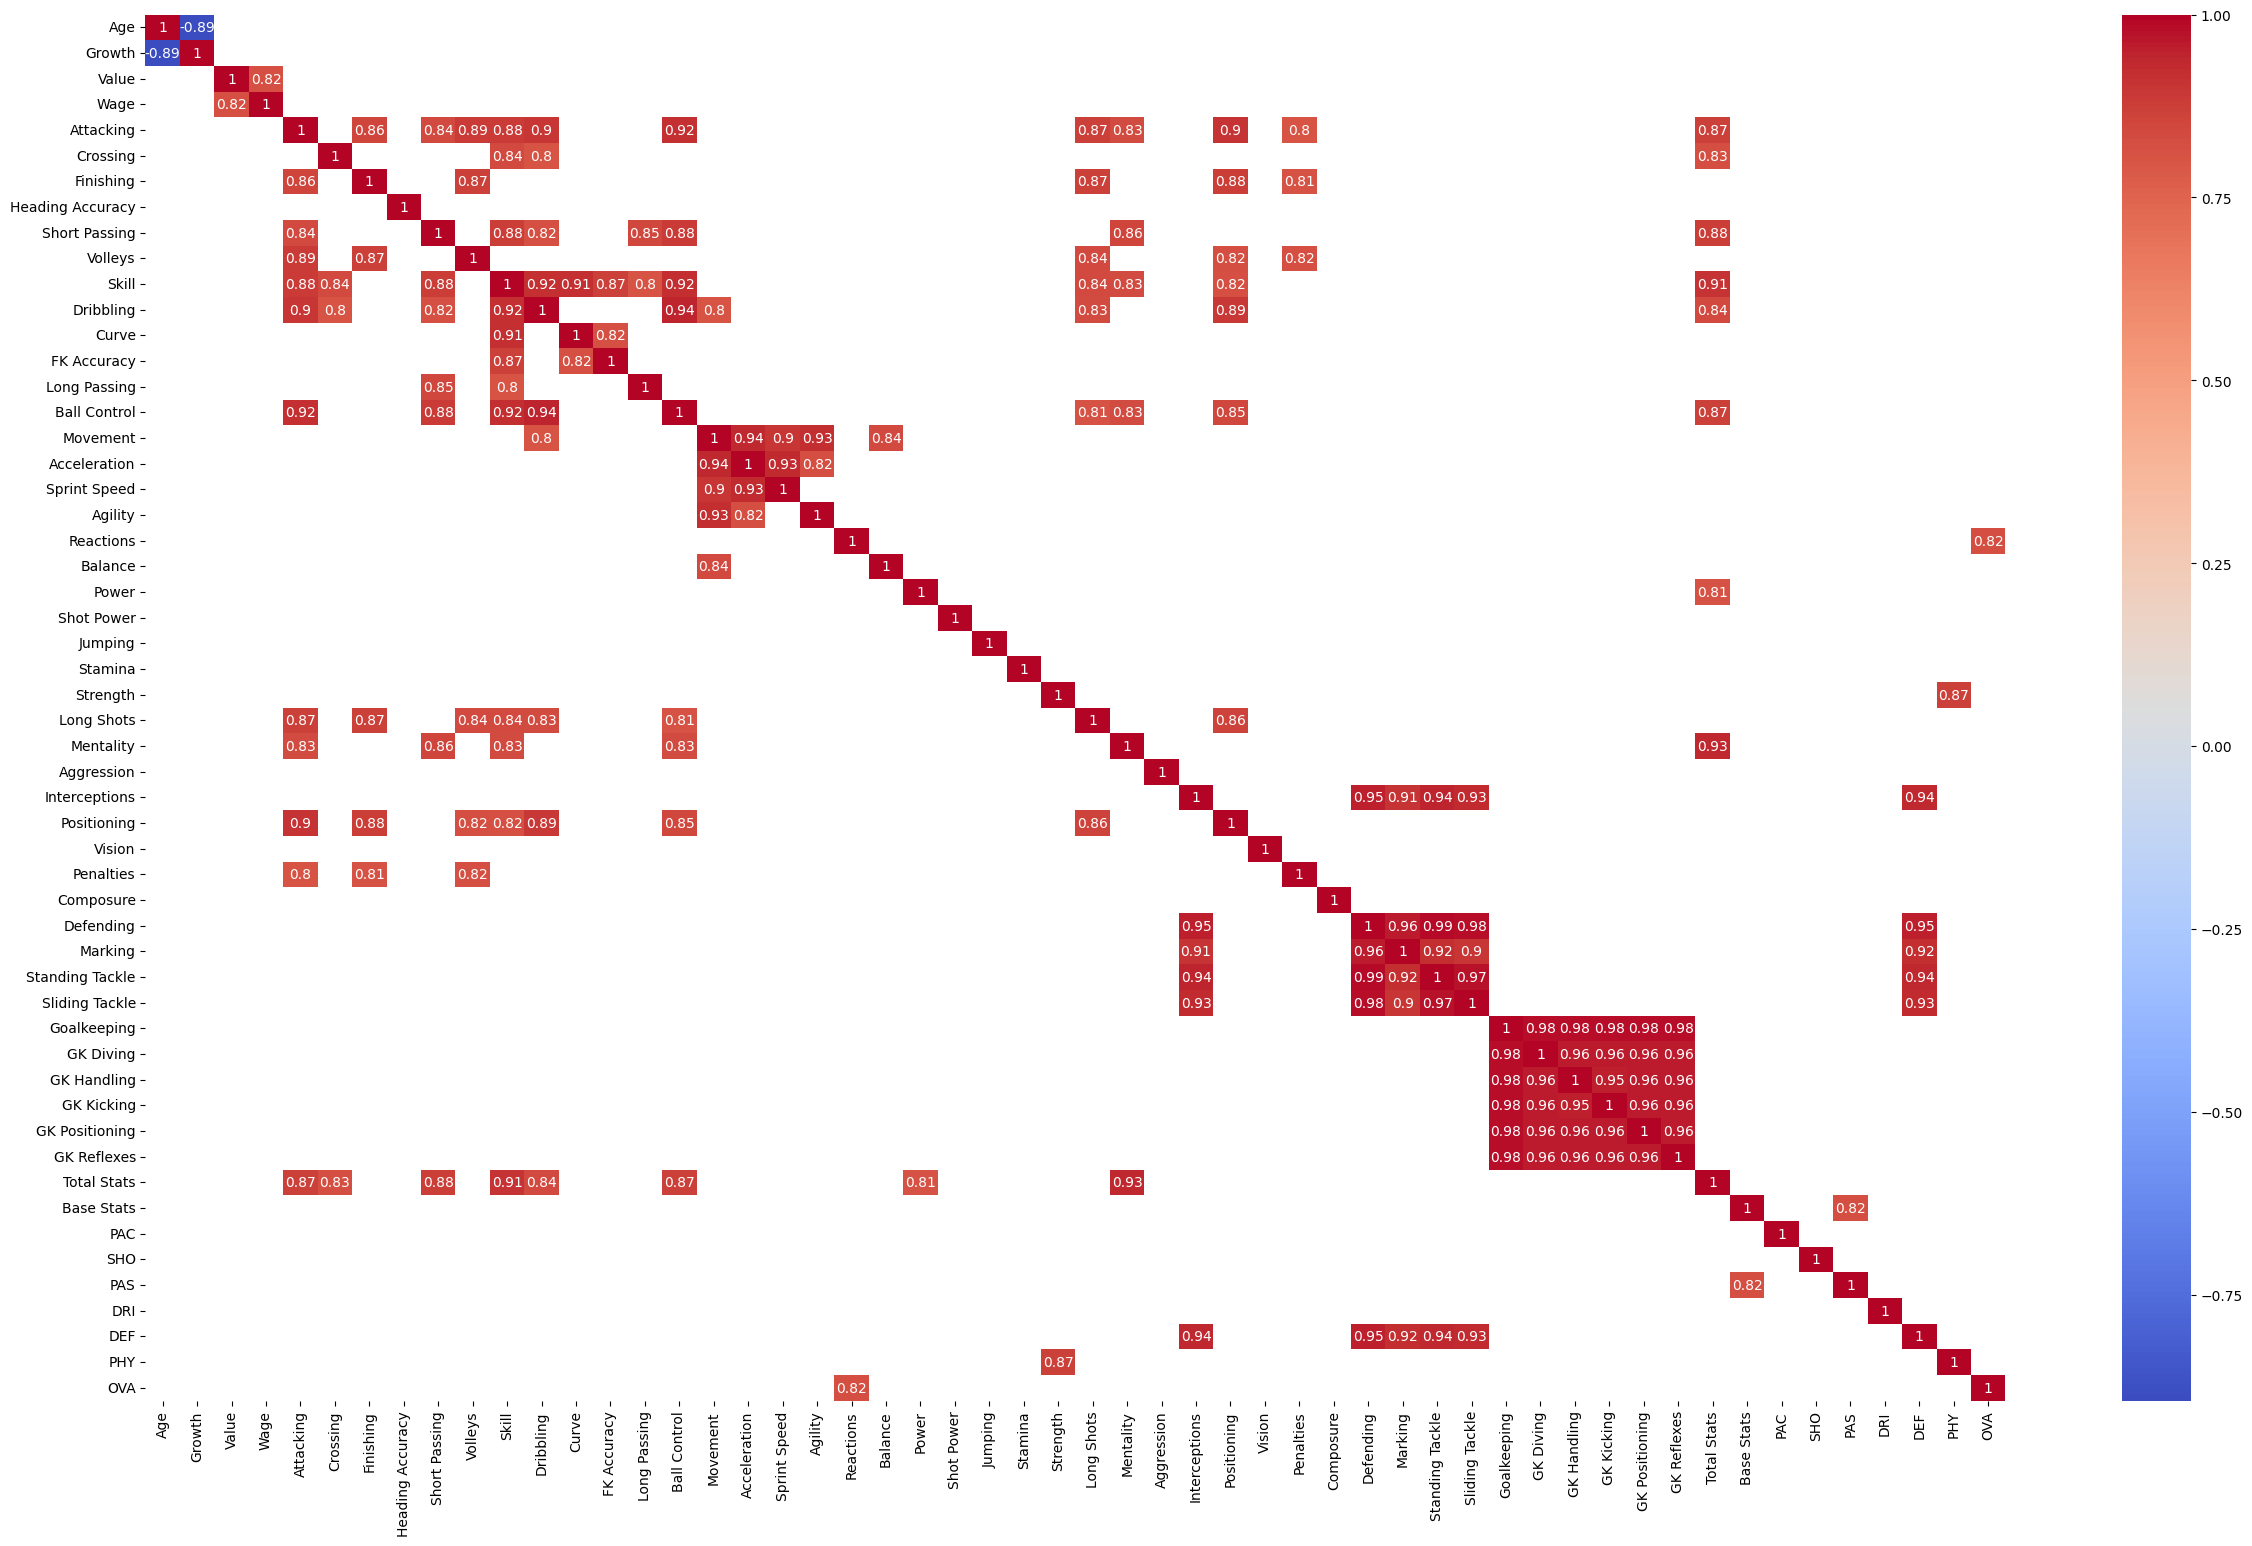

In [24]:
import seaborn as sns
plt.figure(figsize=(30, 18))
dfcor=df_fifa_num.corr()
dfilt=dfcor[(dfcor > 0.8) | (dfcor < -0.8)]
sns.heatmap(dfilt, annot=True, cmap="coolwarm")
plt.show()

Cómo podemos observar, la variable "Dribbling" esta relacionada con "Attacking" con un valor de correlación de 0.9; de hecho presenta cierta lógica ya que los jugadores que suelen atacar son aquellos que necesitan evadirse de los defensas del equipo rival, precisamente regateando ("Dribbling") para despitar al rival y poder tener más probabilidades de gol. Otra correlación nada curiosa, es el caso de la variable "Sprint Speed" con "movement" y "acceleation", básicamente esta relacionando que la velocidad es igual a la massa por aceleración (segunda ley de Newton). "Wage" con "Value también están altamente correlacionados. Cabe destacar que todas las variables que tiene que ver con el portero, entre ellas también estan altamente correlacionadas. 

A continuación, vamos a ver la relación entre las diferentes posiciones con las variables "Ball Control", "Value" y "Sprint Speed"

Text(0.5, 0, 'Tipo de jugador')

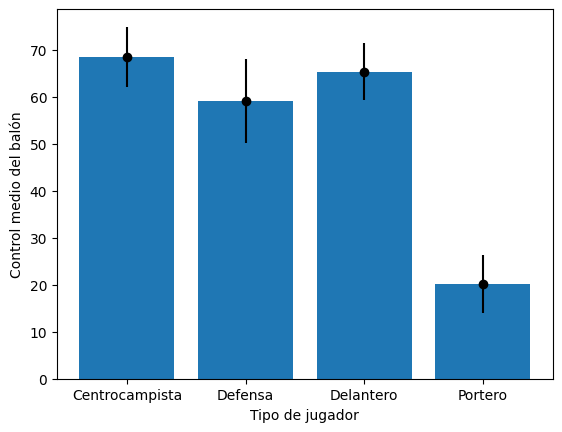

In [53]:
data=df_fifa_clean.groupby('BP').agg({'Ball Control':['mean','std']})
plt.bar(list(data.index), data[('Ball Control', 'mean')])
plt.errorbar(list(data.index), data[('Ball Control', 'mean')], yerr=data[('Ball Control', 'std')],fmt="o", color='black')
plt.ylabel('Control medio del balón')
plt.xlabel('Tipo de jugador')

Cómo se puede observar, el portero, presenta unos valores de control por debajo de las otras posiciones.

Text(0.5, 0, 'Tipo de jugador')

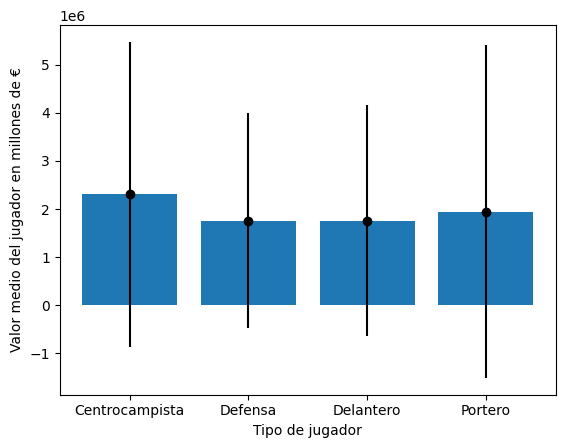

In [58]:
data=df_fifa_clean.groupby('BP').agg({'Value':['mean','std']})
plt.bar(list(data.index), data[('Value', 'mean')])
plt.errorbar(list(data.index), data[('Value', 'mean')], yerr=data[('Value', 'std')],fmt="o", color='black')
plt.ylabel('Valor medio del jugador en millones de €')
plt.xlabel('Tipo de jugador')

Teniendo en cuenta el valor de jugadores, podemos observar que la desviación estandard, es enorme en todas las posiciones, no pudiendo considerar que el valor del jugador dependa del tipo de posición. Esperaba que quizás los porteros estuvieran menos cotizados que los delanteros, pero no ha sido el caso.

Text(0.5, 0, 'Tipo de jugador')

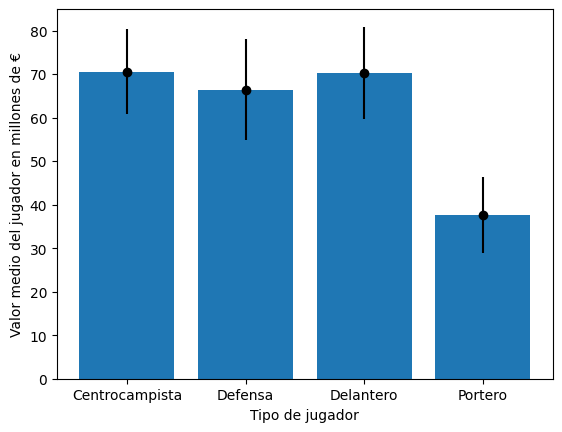

In [59]:
data=df_fifa_clean.groupby('BP').agg({'Sprint Speed':['mean','std']})
plt.bar(list(data.index), data[('Sprint Speed', 'mean')])
plt.errorbar(list(data.index), data[('Sprint Speed', 'mean')], yerr=data[('Sprint Speed', 'std')],fmt="o", color='black')
plt.ylabel('Valor medio del jugador en millones de €')
plt.xlabel('Tipo de jugador')

Tal y como esperabamos, la posición de portero, presenta menos velocidad que otras posiciones en que la velocidad de un jugador es clave. 

Otra forma de visualizar los datos de una forma senzilla teniendo en cuenta su distribución són los gráficos de violin. 

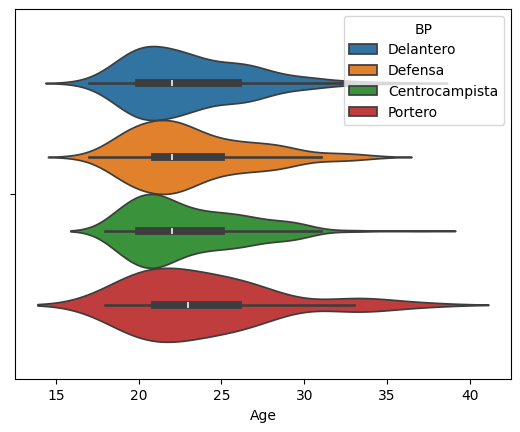

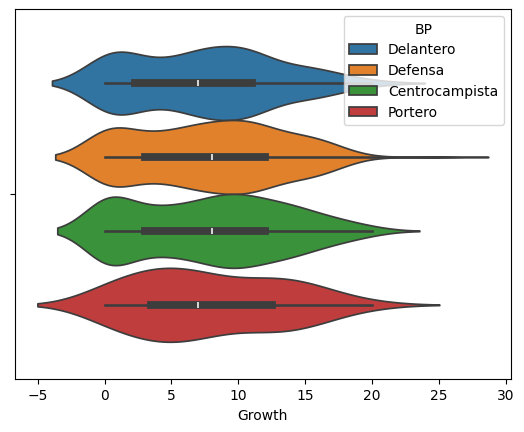

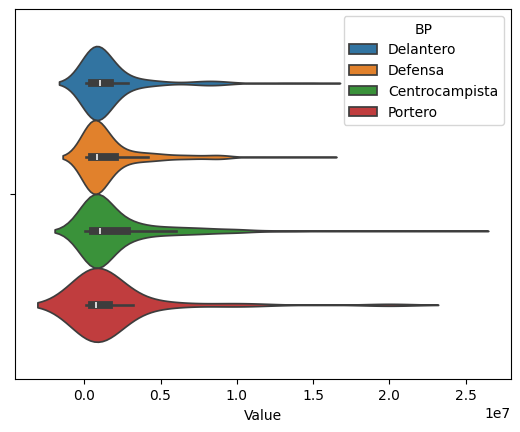

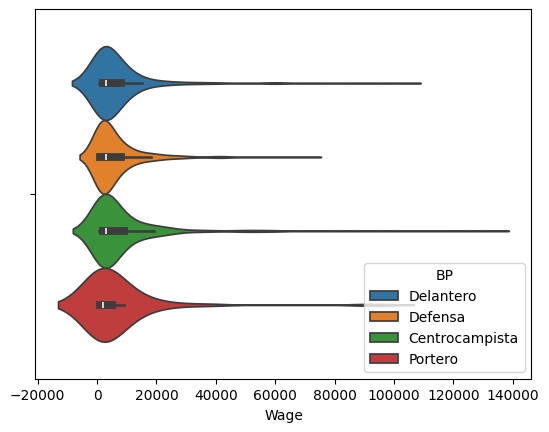

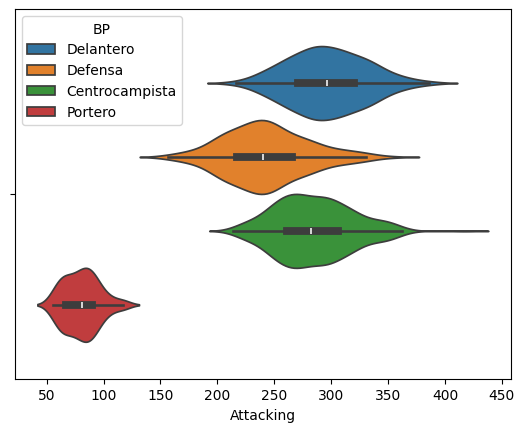

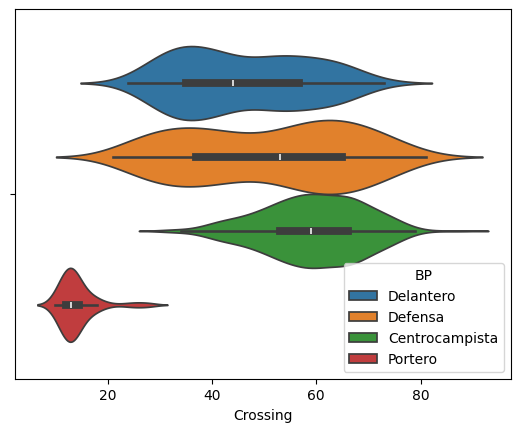

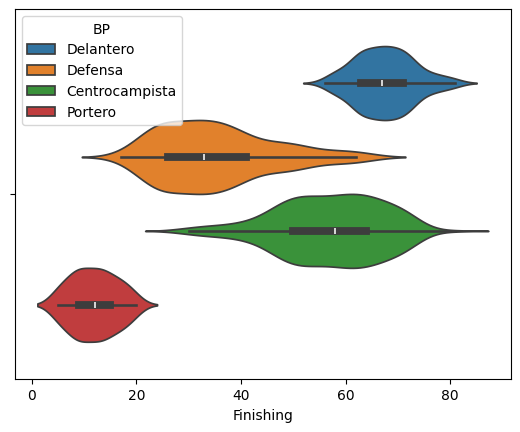

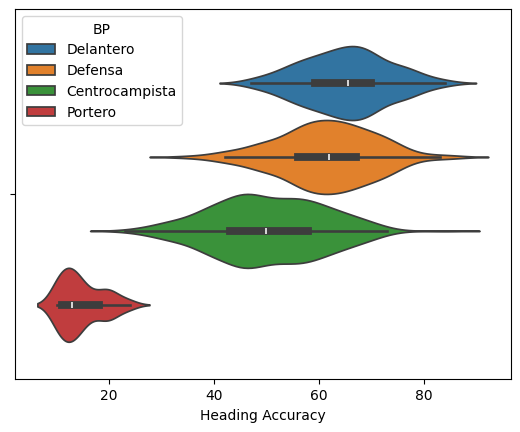

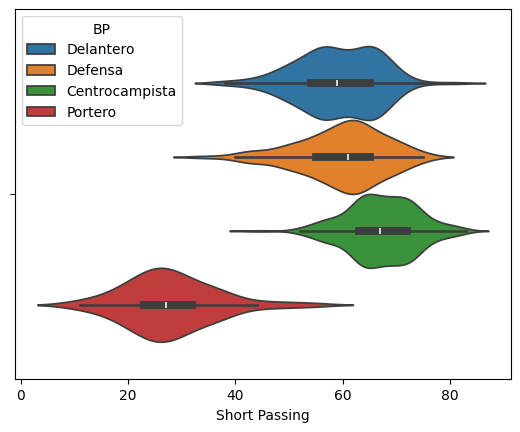

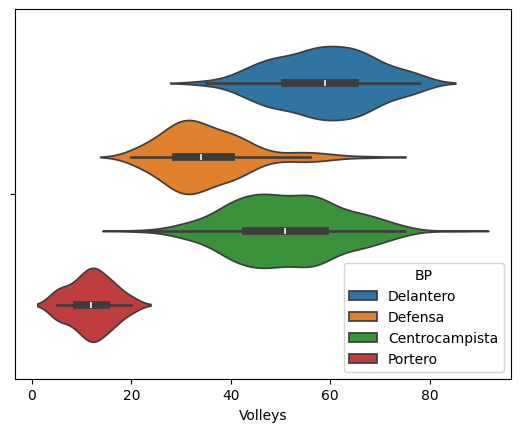

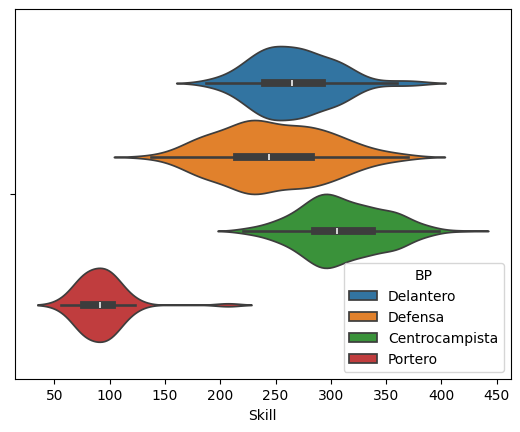

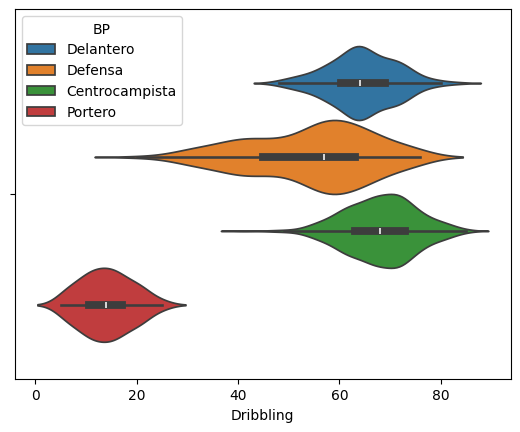

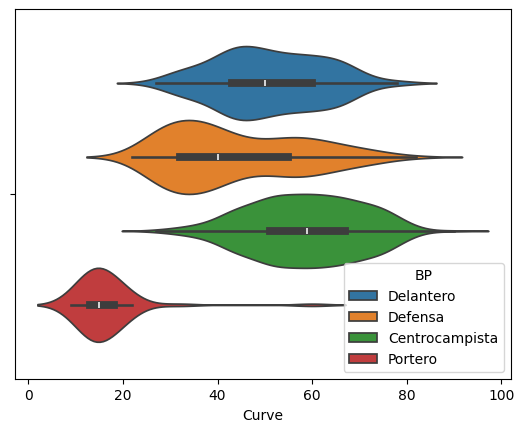

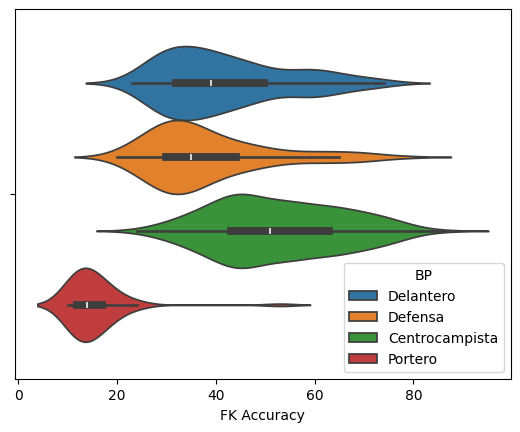

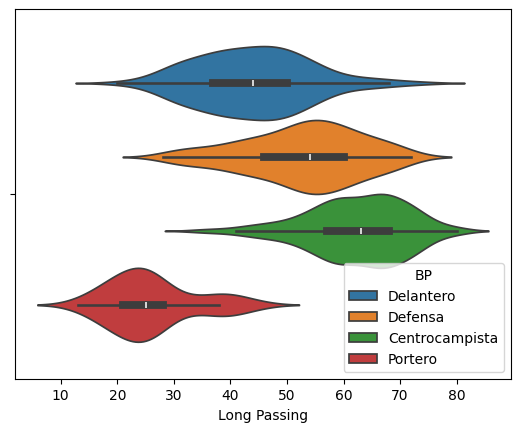

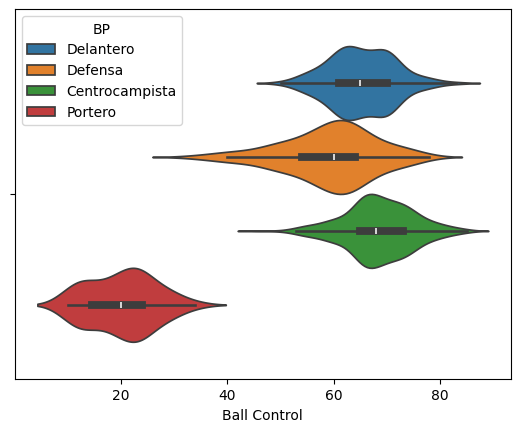

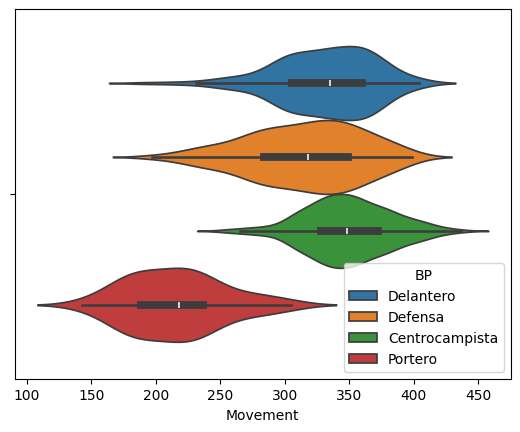

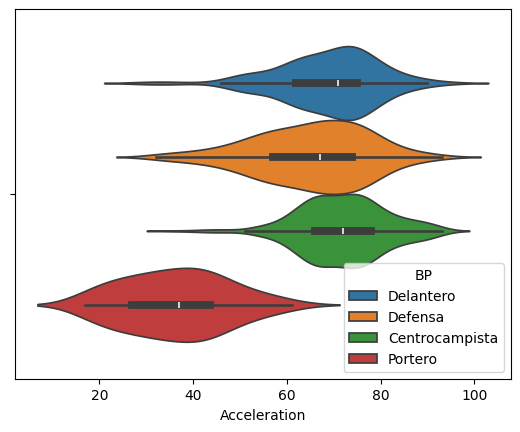

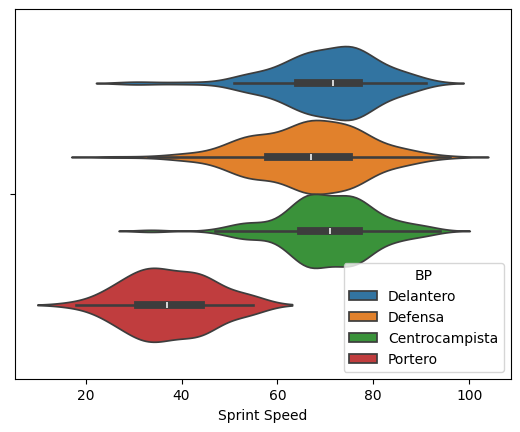

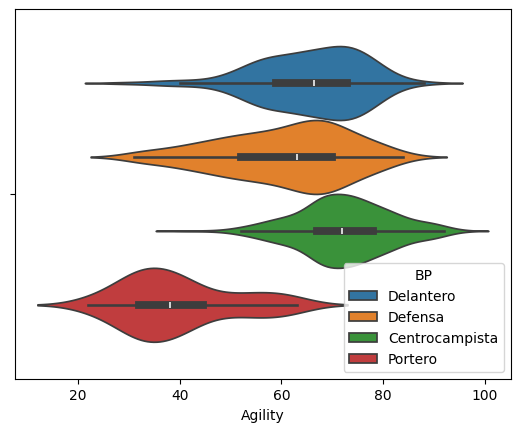

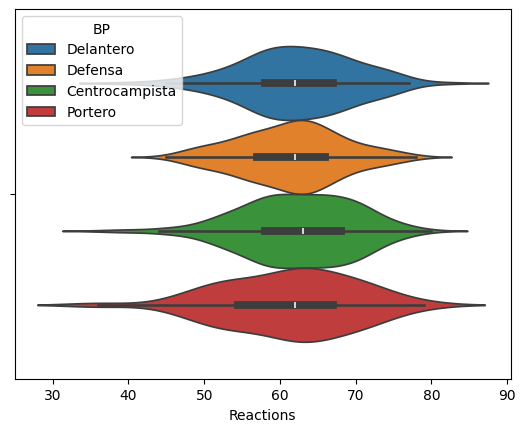

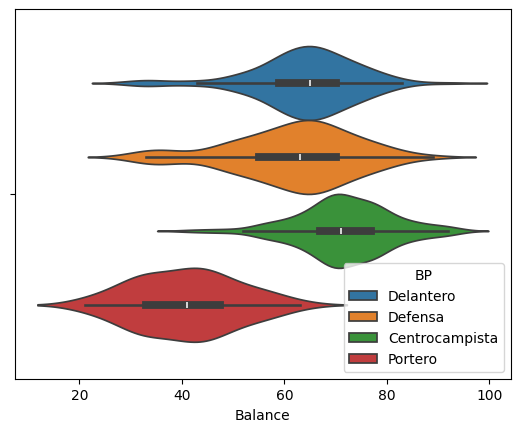

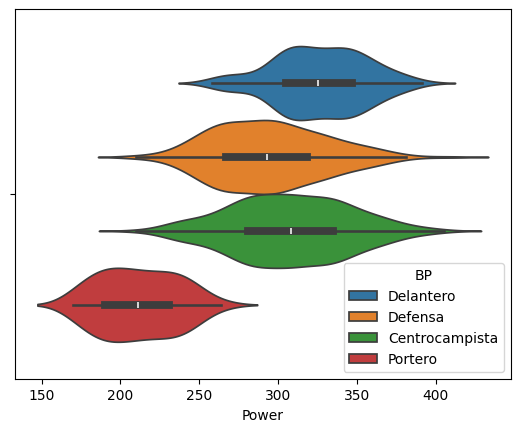

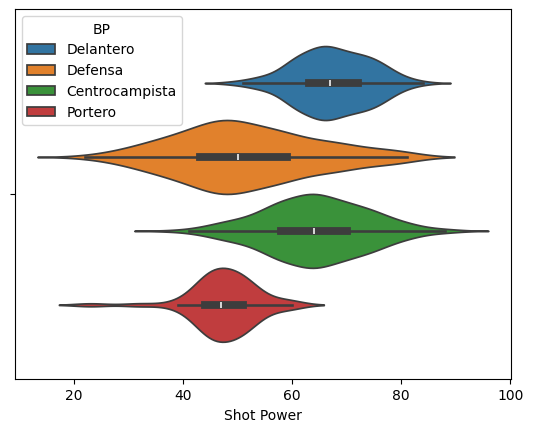

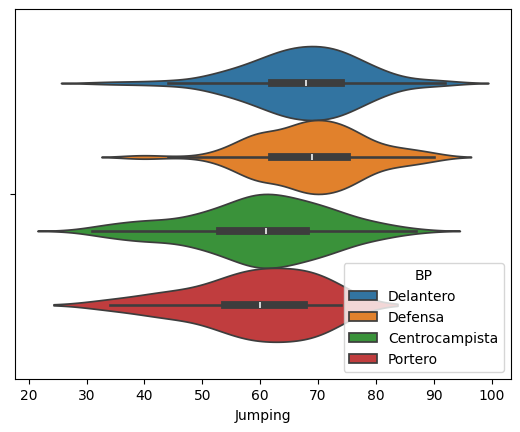

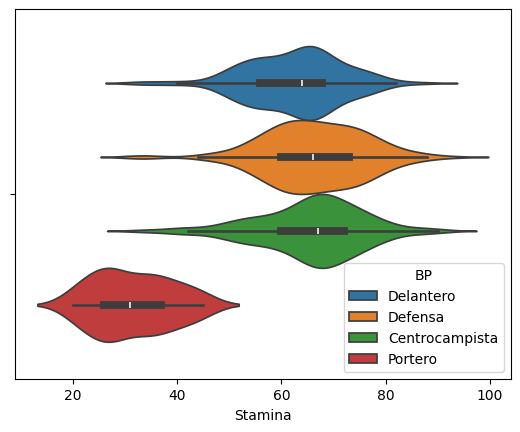

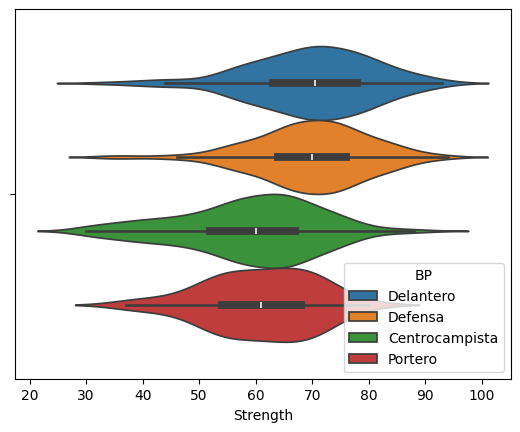

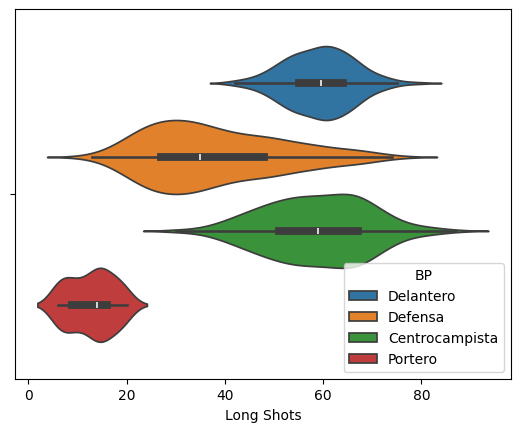

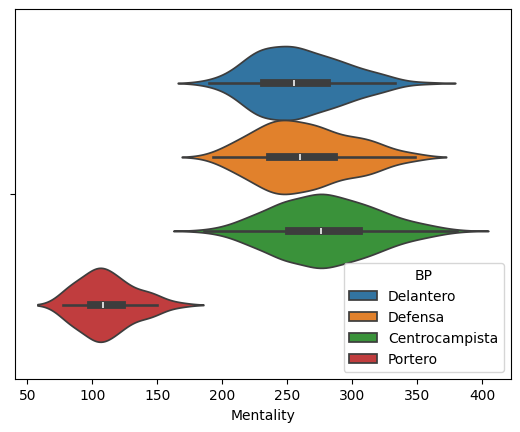

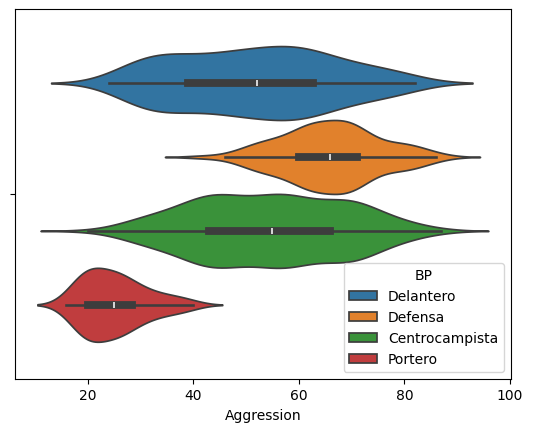

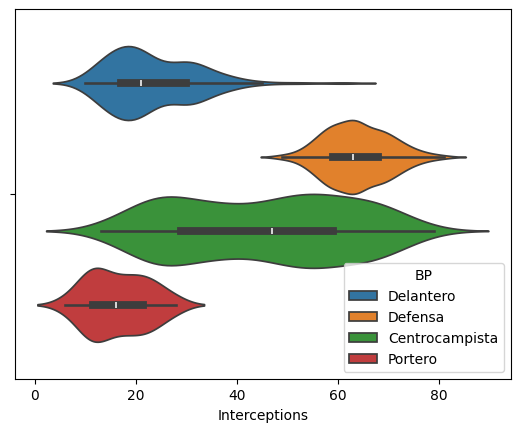

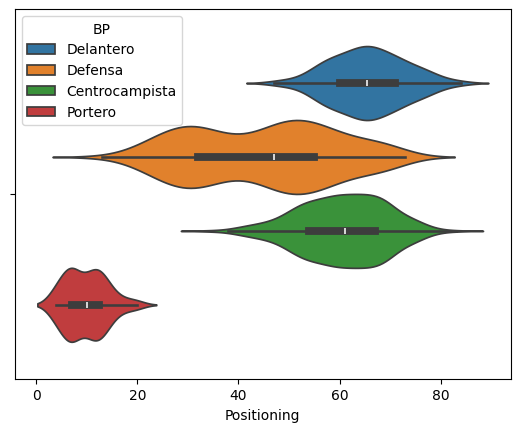

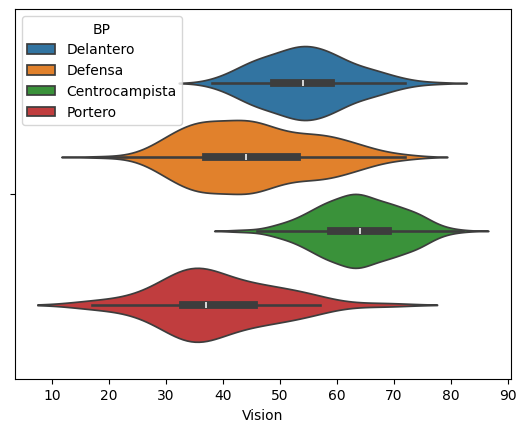

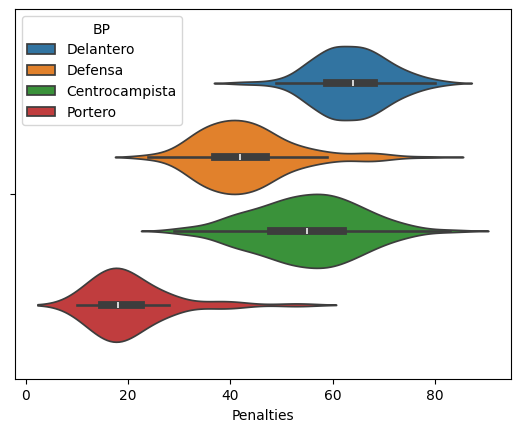

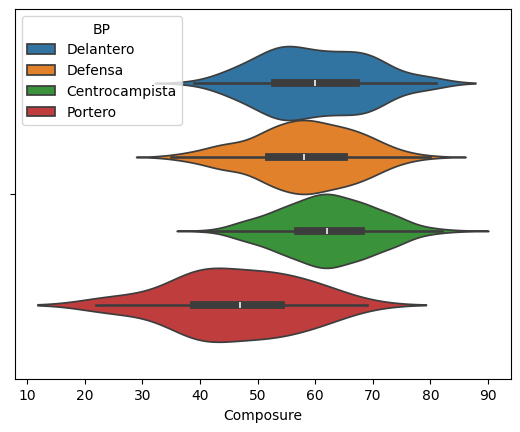

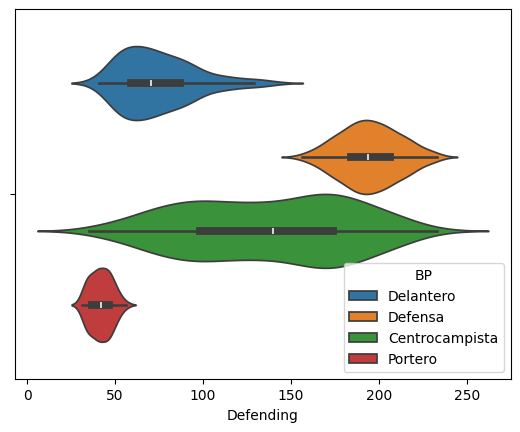

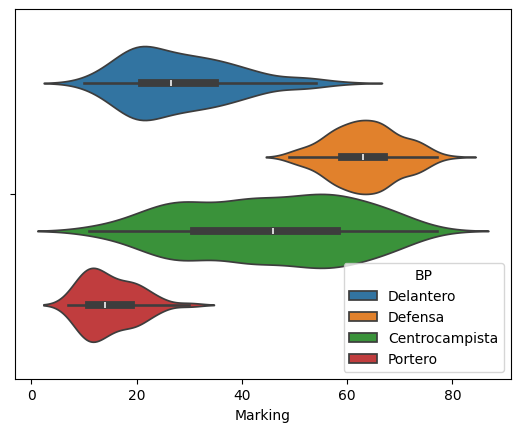

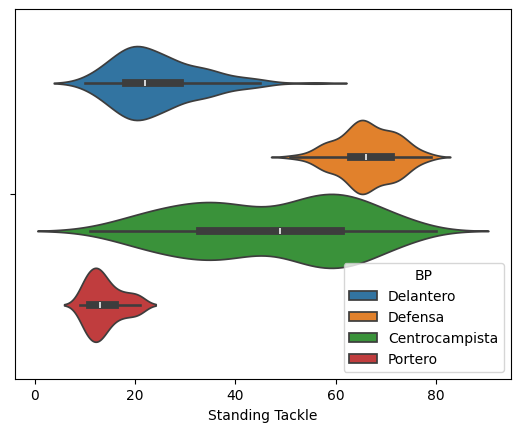

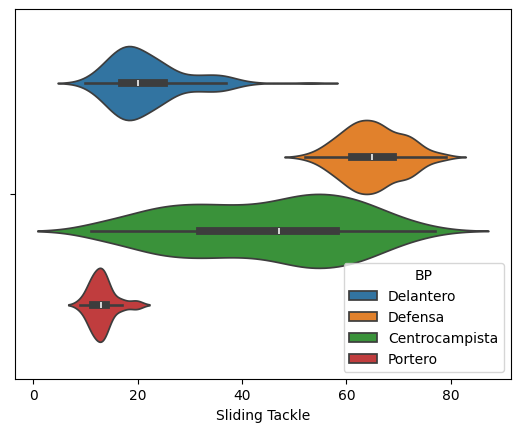

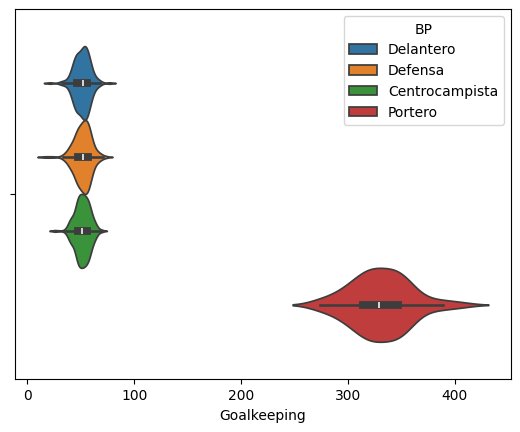

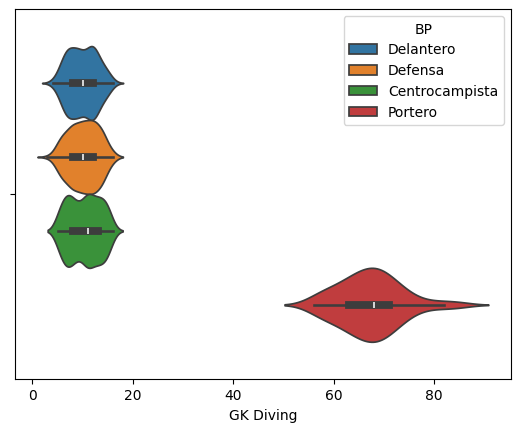

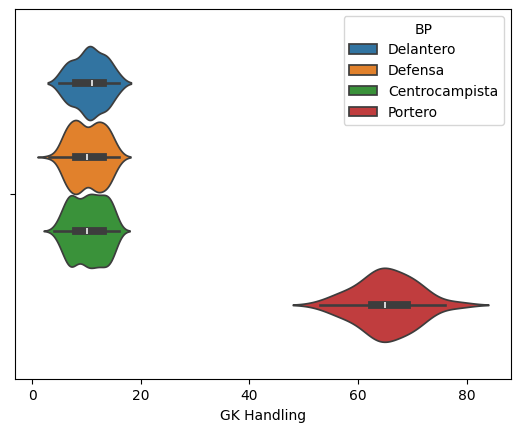

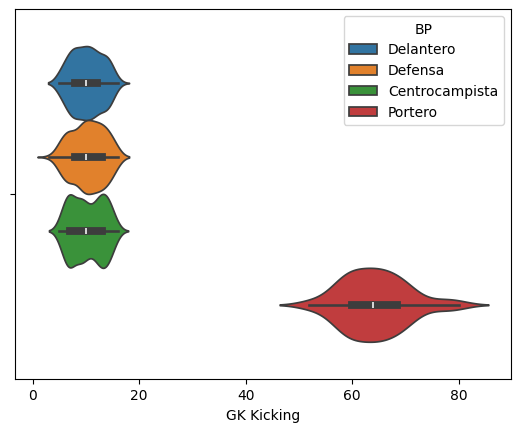

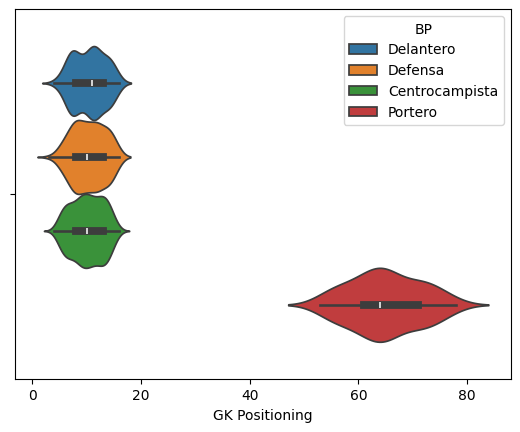

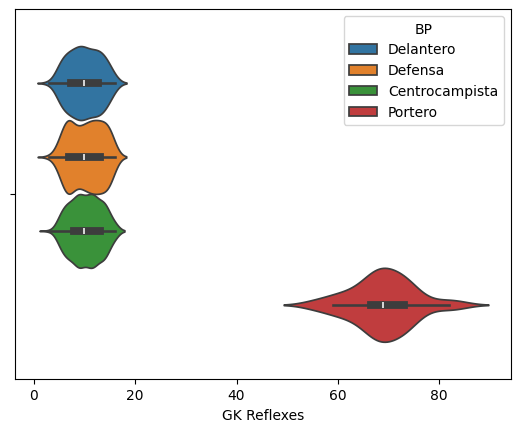

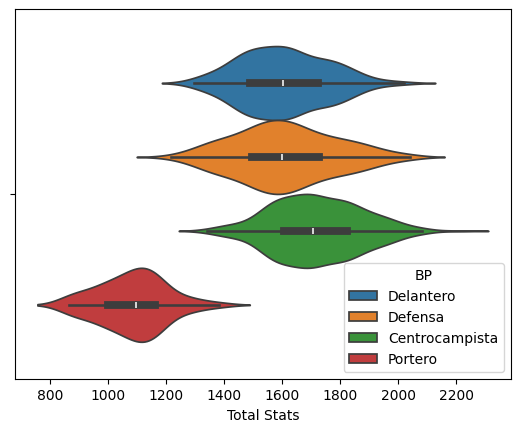

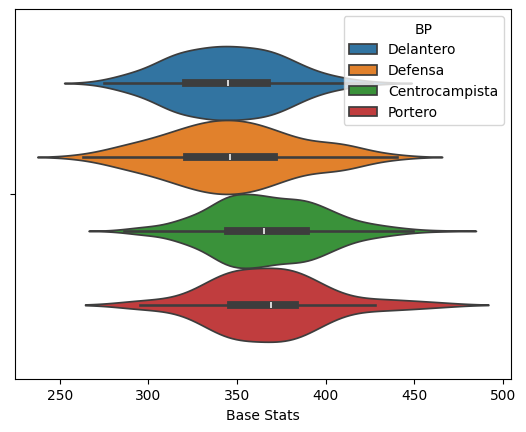

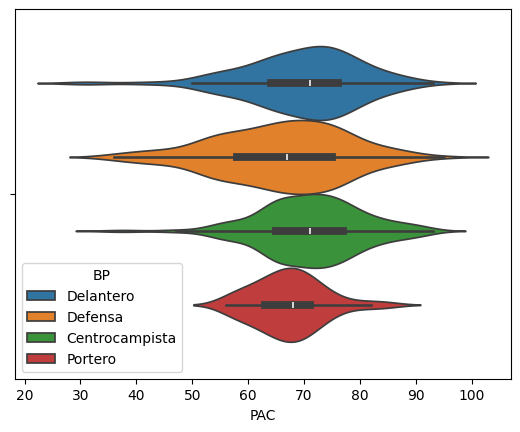

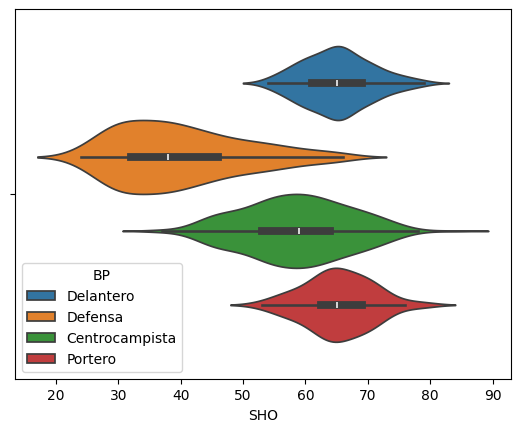

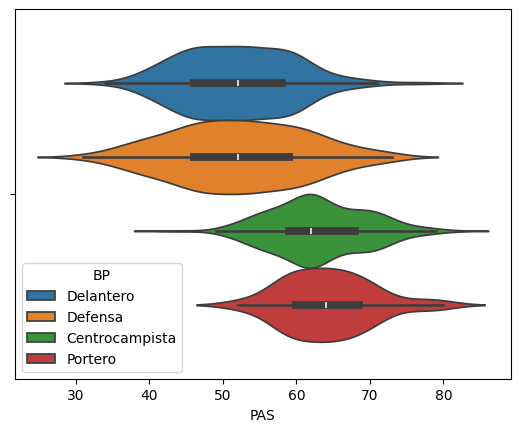

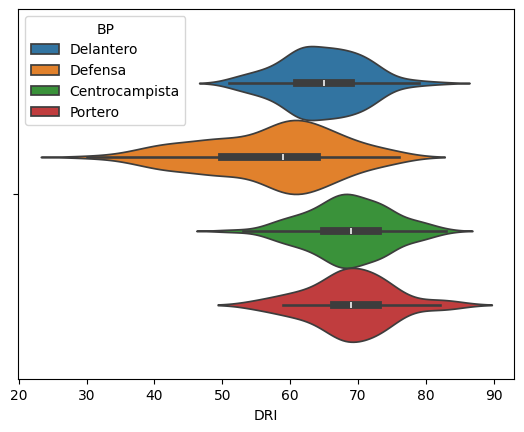

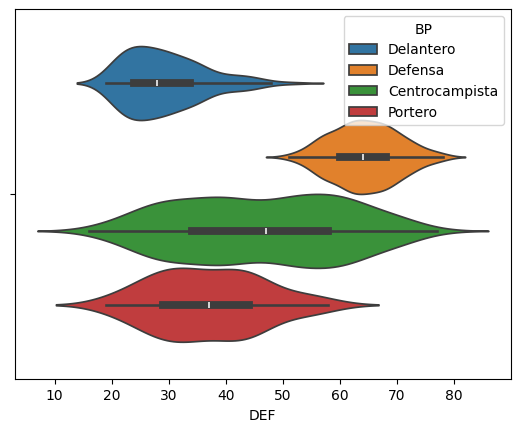

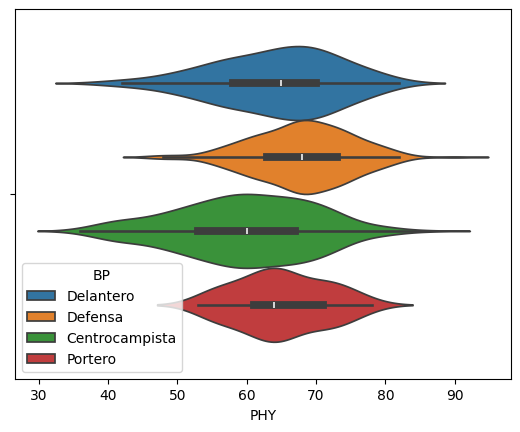

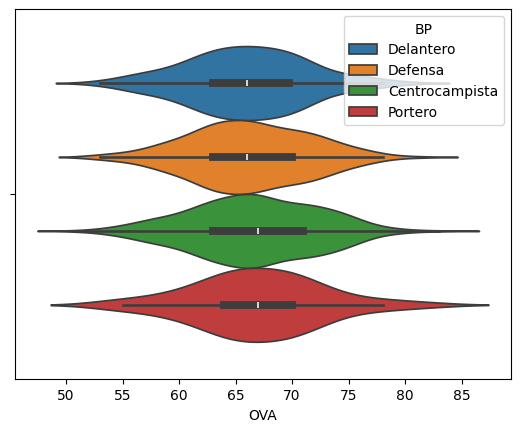

In [63]:
for col in list(df_fifa_num.columns):
    sns.violinplot(data=df_fifa_clean, x=col, hue='BP')
    plt.show()

Analizar los gráficos de violin puede ser labioroso debido a la alta cantidad de variables que posee el dataframe, no obstante hemos podido diferenciar lo siguiente:
-  Las variables Age,Growth,Value,Wage, Reactions, Jumping,Strenght y Composture presentan la misma distribución independientemente de la posición del jugador.
-  Las variables Attacking,Crossing, Finishing, Heading, Accuracy,Shot Passing, Volleys, skill, Dribbling, Curve, Long passing, Ball Control, Movement, Acceleration, Sprint Speed, Agility, Balance, Power, Stamina, Long Shots, Mentality, Agression, Positioning y Penalties presentan unos valores de distribución mucho más bajos para la posición portero que para el resto.
-  Las variables Shot Power y Vision presentan una distribución de valores bajos para las posiciones portero y defensa al contrario que para las posiciones delantero y centrocampista.
-  Las variables Interceptions, Defending, Marking, Stading Tackle, Sliding Tackle presentan una distribución de valores bajos para las posiciones de portero y delantero en comparación con el defensa. Cabe remarcar que la posición de centrocampista presenta una amplia distribución desde valores bajos incluyendo los de portero y delantero hasta valores altos de la posición defensa.
  